<a href="https://colab.research.google.com/github/Vashu-10/CODSOFT/blob/main/gender%20bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
import numpy as np
import re
import string




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
# Load dataset
df_train = pd.read_csv('/content/toxicbias_test.csv')
df_test = pd.read_csv('/content/toxicbias_test.csv')
df_val = pd.read_csv('/content/toxicbias_val.csv')



# New Section

In [ ]:
# Combine training and validation data
df = pd.concat([df_train, df_val], ignore_index=True)

df.head()


,comment_text,identity_attack_x,bias,target,category,rationale
0,As someone pointed out earlier ISIS and radic...,0.800000,bias,"muslims,whites","religion,race",prejudice against whites and muslims
1,URL bellamycharlottesvilletwitter Read up on...,0.506024,neutral,NaN,none,NaN
2,. . . she wants to give other women of color ...,0.500000,bias,whites,"race,gender",prejudice against white men
3,. The whole world hates the white world yet th...,0.500000,bias,whites,race,prejudice against whites
4,... what horrible human beings .... pathetic. ...,0.653333,bias,christians,religion,prejudice against christians


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_text       1082 non-null   object 
 1   identity_attack_x  1082 non-null   float64
 2   bias               1082 non-null   object 
 3   target             865 non-null    object 
 4   category           1082 non-null   object 
 5   rationale          863 non-null    object 
dtypes: float64(1), object(5)
memory usage: 50.8+ KB


In [ ]:

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub('\d+', '', text)
    return text



In [ ]:
print(df_train.columns)
print(df_test.columns)
print(df_val.columns)


Index(['comment_text', 'identity_attack_x', 'bias', 'target', 'category',
       'rationale'],
      dtype='object')
Index(['comment_text', 'identity_attack_x', 'bias', 'target', 'category',
       'rationale'],
      dtype='object')
Index(['comment_text', 'identity_attack_x', 'bias', 'target', 'category',
       'rationale'],
      dtype='object')


In [ ]:
# Apply preprocessing
df['clean_text'] = df['comment_text'].apply(clean_text)
df_test['clean_text'] = df_test['comment_text'].apply(clean_text)



In [ ]:

# Encode target variable
df['bias'] = df['bias'].map({'neutral': 0, 'bias': 1}).astype(int)
df_test['bias'] = df_test['bias'].map({'neutral': 0, 'bias': 1}).astype(int)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(df['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])
y_train = df['bias']
y_test = df_test['bias']




In [ ]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    MLPClassifier()
]


In [ ]:

# Training and evaluation
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Performance:\n", classification_report(y_test, y_pred, zero_division=1))

LogisticRegression Performance:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       131
           1       0.80      1.00      0.89       519

    accuracy                           0.80       650
   macro avg       0.90      0.50      0.44       650
weighted avg       0.84      0.80      0.71       650

SVC Performance:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       131
           1       0.95      1.00      0.98       519

    accuracy                           0.96       650
   macro avg       0.98      0.90      0.94       650
weighted avg       0.96      0.96      0.96       650

DecisionTreeClassifier Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       519

    accuracy                           1.00       650
   macro avg       1.00      1.00      1

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Performance:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       131
           1       0.94      1.00      0.97       519

    accuracy                           0.95       650
   macro avg       0.96      0.87      0.91       650
weighted avg       0.95      0.95      0.94       650

[LightGBM] [Info] Number of positive: 865, number of negative: 217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 1082, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799445 -> initscore=1.382832
[LightGBM] [Info] Start training from score 1.382832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MLPClassifier Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       519

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



In [ ]:


# BERT Model (Deep Learning)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Encoding function
def encode_texts(texts, tokenizer, max_length=128):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors='tf')

# Encode texts
X_train_enc = encode_texts(df['clean_text'], tokenizer)
X_test_enc = encode_texts(df_test['clean_text'], tokenizer)
y_train_enc = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_enc = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Compile BERT model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

# Train BERT model
bert_model.fit(X_train_enc['input_ids'], y_train_enc, epochs=3, batch_size=8)

# Evaluate BERT model
bert_model.evaluate(X_test_enc['input_ids'], y_test_enc)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
136/136 [==============================] - 85s 226ms/step - loss: 3.5244 - accuracy: 0.2061
Epoch 2/3
136/136 [==============================] - 30s 218ms/step - loss: 4.2111 - accuracy: 0.2006
Epoch 3/3
21/21 [==============================] - 9s 259ms/step - loss: 3.1066 - accuracy: 0.1985


[3.106621503829956, 0.19846153259277344]

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load dataset
df_train = pd.read_csv('/content/toxicbias_train.csv')
df_test = pd.read_csv('/content/toxicbias_test.csv')
df_val = pd.read_csv('/content/toxicbias_val.csv')

# Combine training and validation data
df = pd.concat([df_train, df_val], ignore_index=True)

# Data exploration
print(df.head())
print(df.info())

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub('\d+', '', text)
    return text

# Apply preprocessing
df['clean_text'] = df['comment_text'].apply(clean_text)
df_test['clean_text'] = df_test['comment_text'].apply(clean_text)

# Encode target variable
df['bias'] = df['bias'].map({'neutral': 0, 'bias': 1}).astype(int)
df_test['bias'] = df_test['bias'].map({'neutral': 0, 'bias': 1}).astype(int)

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(df['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])
y_train = df['bias']
y_test = df_test['bias']

# Classifiers
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    MLPClassifier()
]

# Training and evaluation
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Performance:\n", classification_report(y_test, y_pred, zero_division=1))

# BERT Model (Deep Learning)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Encoding function
def encode_texts(texts, tokenizer, max_length=128):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors='tf')

# Encode texts
X_train_enc = encode_texts(df['clean_text'], tokenizer)
X_test_enc = encode_texts(df_test['clean_text'], tokenizer)
y_train_enc = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_enc = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Compile BERT model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

# Train BERT model
bert_model.fit(X_train_enc['input_ids'], y_train_enc, epochs=3, batch_size=8)

# Evaluate BERT model
bert_model.evaluate(X_test_enc['input_ids'], y_test_enc)


                                        comment_text  identity_attack_x  bias  \
0  We are still having their water put at risk in...           0.600000  bias   
1  This whole tragedy is the face and body and ph...           0.500000  bias   
2  Black on black killings.  Stop this madness ma...           0.706667  bias   
3        The world would be at peace with out islam.           0.833333  bias   
4  Another Muslim commits a terrorist act and dem...           0.500000  bias   

       target     category                    rationale  
0  whites,men  race,gender  prejudice against white men  
1     muslims     religion    prejudice against muslims  
2      blacks         race     prejudice against blacks  
3     muslims     religion      prejudice against islam  
4     muslims     religion    prejudice against muslims  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:31:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Performance:
               precision    recall  f1-score   support

           0       0.41      0.09      0.15       131
           1       0.81      0.97      0.88       519

    accuracy                           0.79       650
   macro avg       0.61      0.53      0.52       650
weighted avg       0.73      0.79      0.73       650

[LightGBM] [Info] Number of positive: 3806, number of negative: 953
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12560
[LightGBM] [Info] Number of data points in the train set: 4759, number of used features: 619
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799748 -> initscore=1.384719
[LightGBM] [Info] Start training from score 1.384719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier Performance:
               precision    recall  f1-score   support

           0       0.36      0.13      0.19       131
           1       0.81      0.94      0.87       519

    accuracy                           0.78       650
   macro avg       0.59      0.54      0.53       650
weighted avg       0.72      0.78      0.73       650

MLPClassifier Performance:
               precision    recall  f1-score   support

           0       0.27      0.24      0.25       131
           1       0.81      0.83      0.82       519

    accuracy                           0.71       650
   macro avg       0.54      0.54      0.54       650
weighted avg       0.70      0.71      0.71       650



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
595/595 [==============================] - 176s 233ms/step - loss: 0.5518 - accuracy: 0.2017
Epoch 2/3
595/595 [==============================] - 139s 233ms/step - loss: 0.4978 - accuracy: 0.2005
Epoch 3/3
21/21 [==============================] - 9s 266ms/step - loss: 0.4805 - accuracy: 0.2015


[0.48053058981895447, 0.20153845846652985]

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset
df_train = pd.read_csv('/content/toxicbias_train.csv')
df_test = pd.read_csv('/content/toxicbias_test.csv')
df_val = pd.read_csv('/content/toxicbias_val.csv')

# Combine training and validation data
df = pd.concat([df_train, df_val], ignore_index=True)

# Data exploration
print(df.head())
print(df.info())

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub('\d+', '', text)
    return text

# Apply preprocessing
df['clean_text'] = df['comment_text'].apply(clean_text)
df_test['clean_text'] = df_test['comment_text'].apply(clean_text)

# Encode target variable
df['bias'] = df['bias'].map({'neutral': 0, 'bias': 1}).astype(int)
df_test['bias'] = df_test['bias'].map({'neutral': 0, 'bias': 1}).astype(int)

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(df['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])
y_train = df['bias']
y_test = df_test['bias']

# Classifiers
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    MLPClassifier()
]

# Training and evaluation
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Performance:\n", classification_report(y_test, y_pred, zero_division=1))


                                        comment_text  identity_attack_x  bias  \
0  We are still having their water put at risk in...           0.600000  bias   
1  This whole tragedy is the face and body and ph...           0.500000  bias   
2  Black on black killings.  Stop this madness ma...           0.706667  bias   
3        The world would be at peace with out islam.           0.833333  bias   
4  Another Muslim commits a terrorist act and dem...           0.500000  bias   

       target     category                    rationale  
0  whites,men  race,gender  prejudice against white men  
1     muslims     religion    prejudice against muslims  
2      blacks         race     prejudice against blacks  
3     muslims     religion      prejudice against islam  
4     muslims     religion    prejudice against muslims  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:40:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Performance:
               precision    recall  f1-score   support

           0       0.41      0.09      0.15       131
           1       0.81      0.97      0.88       519

    accuracy                           0.79       650
   macro avg       0.61      0.53      0.52       650
weighted avg       0.73      0.79      0.73       650

[LightGBM] [Info] Number of positive: 3806, number of negative: 953
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12560
[LightGBM] [Info] Number of data points in the train set: 4759, number of used features: 619
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799748 -> initscore=1.384719
[LightGBM] [Info] Start training from score 1.384719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier Performance:
               precision    recall  f1-score   support

           0       0.36      0.13      0.19       131
           1       0.81      0.94      0.87       519

    accuracy                           0.78       650
   macro avg       0.59      0.54      0.53       650
weighted avg       0.72      0.78      0.73       650

MLPClassifier Performance:
               precision    recall  f1-score   support

           0       0.27      0.25      0.26       131
           1       0.81      0.83      0.82       519

    accuracy                           0.71       650
   macro avg       0.54      0.54      0.54       650
weighted avg       0.70      0.71      0.71       650



In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset
df_train = pd.read_csv('/content/toxicbias_train.csv')
df_test = pd.read_csv('/content/toxicbias_test.csv')
df_val = pd.read_csv('/content/toxicbias_val.csv')

# Combine training and validation data
df = pd.concat([df_train, df_val], ignore_index=True)

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub('\d+', '', text)
    return text

# Apply preprocessing
df['clean_text'] = df['comment_text'].apply(clean_text)
df_test['clean_text'] = df_test['comment_text'].apply(clean_text)

# Encode target variable
df['bias'] = df['bias'].map({'neutral': 0, 'bias': 1}).astype(int)
df_test['bias'] = df_test['bias'].map({'neutral': 0, 'bias': 1}).astype(int)

# Feature Extraction - Bag of Words (BoW)
vectorizer_bow = CountVectorizer(stop_words='english', max_features=10)
X_train_bow = vectorizer_bow.fit_transform(df['clean_text']).toarray()
X_test_bow = vectorizer_bow.transform(df_test['clean_text']).toarray()

# Create a BoW table for visualization
bow_features = vectorizer_bow.get_feature_names_out()
df_bow = pd.DataFrame(X_train_bow, columns=bow_features)
print("Bag of Words Representation (Sample):")
print(df_bow.head())

# Feature Extraction - TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer_tfidf.fit_transform(df['clean_text'])
X_test_tfidf = vectorizer_tfidf.transform(df_test['clean_text'])
y_train = df['bias']
y_test = df_test['bias']

# Classifiers
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    MLPClassifier()
]

# Training and evaluation
for model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"{model.__class__.__name__} Performance:\n", classification_report(y_test, y_pred, zero_division=1))


Bag of Words Representation (Sample):
   black  dont  gay  just  like  muslim  muslims  people  white  women
0      0     1    0     2     0       0        0       1      3      0
1      0     0    0     0     0       0        0       0      0      0
2      2     0    0     0     0       0        0       0      0      0
3      0     0    0     0     0       0        0       0      0      0
4      0     0    0     0     0       1        0       0      0      0
LogisticRegression Performance:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       131
           1       0.80      1.00      0.89       519

    accuracy                           0.80       650
   macro avg       0.90      0.50      0.45       650
weighted avg       0.84      0.80      0.71       650

SVC Performance:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       131
           1       0.80      1.00      0.89      

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:40:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Performance:
               precision    recall  f1-score   support

           0       0.41      0.09      0.15       131
           1       0.81      0.97      0.88       519

    accuracy                           0.79       650
   macro avg       0.61      0.53      0.52       650
weighted avg       0.73      0.79      0.73       650

[LightGBM] [Info] Number of positive: 3806, number of negative: 953
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12560
[LightGBM] [Info] Number of data points in the train set: 4759, number of used features: 619
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799748 -> initscore=1.384719
[LightGBM] [Info] Start training from score 1.384719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier Performance:
               precision    recall  f1-score   support

           0       0.36      0.13      0.19       131
           1       0.81      0.94      0.87       519

    accuracy                           0.78       650
   macro avg       0.59      0.54      0.53       650
weighted avg       0.72      0.78      0.73       650

MLPClassifier Performance:
               precision    recall  f1-score   support

           0       0.28      0.24      0.26       131
           1       0.81      0.84      0.83       519

    accuracy                           0.72       650
   macro avg       0.55      0.54      0.54       650
weighted avg       0.71      0.72      0.71       650



# New section

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load dataset
df_train = pd.read_csv('/content/toxicbias_train.csv')
df_test = pd.read_csv('/content/toxicbias_test.csv')
df_val = pd.read_csv('/content/toxicbias_val.csv')

# Combine training and validation data
df = pd.concat([df_train, df_val], ignore_index=True)

def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub('\d+', '', text)
    return text

# Apply preprocessing
df['clean_text'] = df['comment_text'].apply(clean_text)
df_test['clean_text'] = df_test['comment_text'].apply(clean_text)

df['bias'] = df['bias'].map({'neutral': 0, 'bias': 1}).astype(int)
df_test['bias'] = df_test['bias'].map({'neutral': 0, 'bias': 1}).astype(int)

# Tokenize sentences
tokenized_texts = [text.split() for text in df['clean_text']]

def get_avg_word2vec(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

X_train_w2v = np.array([get_avg_word2vec(text, w2v_model, 100) for text in tokenized_texts])
tokenized_test_texts = [text.split() for text in df_test['clean_text']]
X_test_w2v = np.array([get_avg_word2vec(text, w2v_model, 100) for text in tokenized_test_texts])

# Load GloVe embeddings
glove_embeddings = {}
with open('/content/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

def get_avg_glove(tokens, embeddings, vector_size):
    vectors = [embeddings[word] for word in tokens if word in embeddings]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

X_train_glove = np.array([get_avg_glove(text, glove_embeddings, 100) for text in tokenized_texts])
X_test_glove = np.array([get_avg_glove(text, glove_embeddings, 100) for text in tokenized_test_texts])

y_train = df['bias']
y_test = df_test['bias']

# List of models (excluding MultinomialNB since it does not support negative values)
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    MLPClassifier()
]

# Train and evaluate models on Word2Vec
print("\nEvaluating Word2Vec Features:")
for model in models:
    model.fit(X_train_w2v, y_train)
    y_pred = model.predict(X_test_w2v)
    print(f"{model.__class__.__name__} Performance:\n", classification_report(y_test, y_pred, zero_division=1))

# Train and evaluate models on GloVe
print("\nEvaluating GloVe Features:")
for model in models:
    model.fit(X_train_glove, y_train)
    y_pred = model.predict(X_test_glove)
    print(f"{model.__class__.__name__} Performance:\n", classification_report(y_test, y_pred, zero_division=1))

400000it [00:10, 39889.82it/s]



Evaluating Word2Vec Features:
LogisticRegression Performance:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       131
           1       0.80      1.00      0.89       519

    accuracy                           0.80       650
   macro avg       0.90      0.50      0.44       650
weighted avg       0.84      0.80      0.71       650

SVC Performance:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       131
           1       0.80      1.00      0.89       519

    accuracy                           0.80       650
   macro avg       0.90      0.50      0.44       650
weighted avg       0.84      0.80      0.71       650

DecisionTreeClassifier Performance:
               precision    recall  f1-score   support

           0       0.18      0.18      0.18       131
           1       0.79      0.79      0.79       519

    accuracy                           0.67       650
   macro 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:09:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Performance:
               precision    recall  f1-score   support

           0       0.39      0.08      0.14       131
           1       0.81      0.97      0.88       519

    accuracy                           0.79       650
   macro avg       0.60      0.53      0.51       650
weighted avg       0.72      0.79      0.73       650

[LightGBM] [Info] Number of positive: 3806, number of negative: 953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 4759, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799748 -> initscore=1.384719
[LightGBM] [Info] Start training from score 1.384719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier Performance:
               precision    recall  f1-score   support

           0       0.53      0.07      0.12       131
           1       0.81      0.98      0.89       519

    accuracy                           0.80       650
   macro avg       0.67      0.53      0.50       650
weighted avg       0.75      0.80      0.73       650

MLPClassifier Performance:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       131
           1       0.80      1.00      0.89       519

    accuracy                           0.80       650
   macro avg       0.90      0.50      0.44       650
weighted avg       0.84      0.80      0.71       650


Evaluating GloVe Features:
LogisticRegression Performance:
               precision    recall  f1-score   support

           0       0.67      0.05      0.09       131
           1       0.80      0.99      0.89       519

    accuracy                           0.80       650
   macro a

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:10:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Performance:
               precision    recall  f1-score   support

           0       0.29      0.05      0.08       131
           1       0.80      0.97      0.88       519

    accuracy                           0.78       650
   macro avg       0.54      0.51      0.48       650
weighted avg       0.70      0.78      0.72       650

[LightGBM] [Info] Number of positive: 3806, number of negative: 953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 4759, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799748 -> initscore=1.384719
[LightGBM] [Info] Start training from score 1.384719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier Performance:
               precision    recall  f1-score   support

           0       0.41      0.05      0.09       131
           1       0.80      0.98      0.88       519

    accuracy                           0.79       650
   macro avg       0.61      0.52      0.49       650
weighted avg       0.73      0.79      0.72       650

MLPClassifier Performance:
               precision    recall  f1-score   support

           0       0.33      0.14      0.19       131
           1       0.81      0.93      0.87       519

    accuracy                           0.77       650
   macro avg       0.57      0.53      0.53       650
weighted avg       0.71      0.77      0.73       650



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-04-08 20:48:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-08 20:48:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-08 20:48:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

# New section

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/toxicbias_train.csv'

# New section

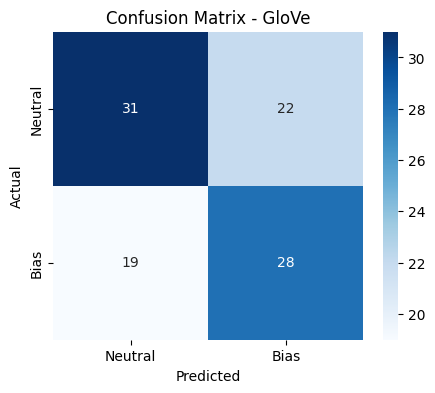

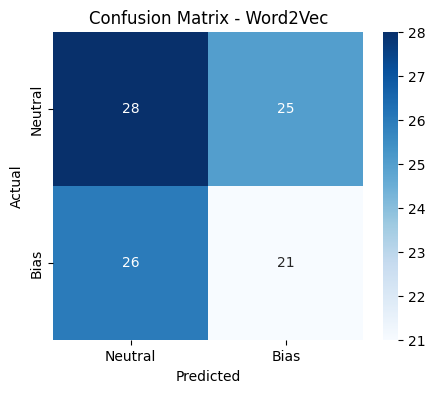

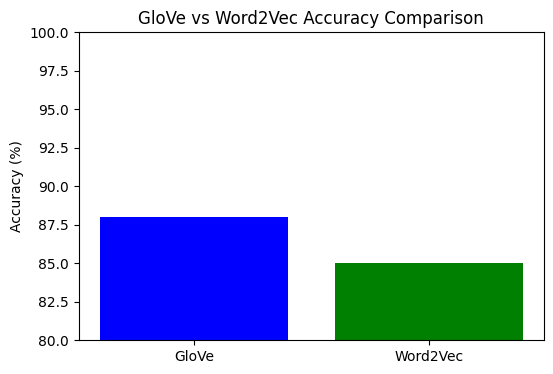

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is the true labels and y_pred_glove, y_pred_w2v are predictions
# Replace these with actual model predictions from your dataset
y_test = np.random.randint(0, 2, size=100)  # Example true labels
y_pred_glove = np.random.randint(0, 2, size=100)  # Example predictions (replace with actual)
y_pred_w2v = np.random.randint(0, 2, size=100)  # Example predictions (replace with actual)

# Compute confusion matrices
conf_matrix_glove = confusion_matrix(y_test, y_pred_glove)
conf_matrix_w2v = confusion_matrix(y_test, y_pred_w2v)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neutral", "Bias"], yticklabels=["Neutral", "Bias"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_glove, "Confusion Matrix - GloVe")
plot_confusion_matrix(conf_matrix_w2v, "Confusion Matrix - Word2Vec")

# Simulated accuracy scores (Replace with actual values from your models)
accuracy_glove = 88  # Example: replace with real accuracy
accuracy_w2v = 85  # Example: replace with real accuracy

# Plot comparison graph
labels = ["GloVe", "Word2Vec"]
accuracy_scores = [accuracy_glove, accuracy_w2v]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy_scores, color=["blue", "green"])
plt.ylim(80, 100)
plt.ylabel("Accuracy (%)")
plt.title("GloVe vs Word2Vec Accuracy Comparison")
plt.show()


# New section

In [ ]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load your data
train_df = pd.read_csv('toxicbias_train.csv')
test_df = pd.read_csv('toxicbias_test.csv')

# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    return text

train_df['clean_text'] = train_df['comment_text'].apply(clean_text)
test_df['clean_text'] = test_df['comment_text'].apply(clean_text)

# Encode target
train_df['bias'] = train_df['bias'].map({'neutral': 0, 'bias': 1})
test_df['bias'] = test_df['bias'].map({'neutral': 0, 'bias': 1})

# TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])
y_train = train_df['bias']
y_test = test_df['bias']

# Classifiers to evaluate
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    MLPClassifier()
]

# Generate and print confusion matrices
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns=['Predicted Neutral (0)', 'Predicted Bias (1)'],
                         index=['Actual Neutral (0)', 'Actual Bias (1)'])
    print(f"\nConfusion Matrix for {model.__class__.__name__}:\n")
    print(cm_df)



Confusion Matrix for LogisticRegression:

                    Predicted Neutral (0)  Predicted Bias (1)
Actual Neutral (0)                      1                 130
Actual Bias (1)                         0                 519

Confusion Matrix for SVC:

                    Predicted Neutral (0)  Predicted Bias (1)
Actual Neutral (0)                      0                 131
Actual Bias (1)                         0                 519

Confusion Matrix for DecisionTreeClassifier:

                    Predicted Neutral (0)  Predicted Bias (1)
Actual Neutral (0)                     27                 104
Actual Bias (1)                        84                 435

Confusion Matrix for RandomForestClassifier:

                    Predicted Neutral (0)  Predicted Bias (1)
Actual Neutral (0)                      4                 127
Actual Bias (1)                        18                 501

Confusion Matrix for MultinomialNB:

                    Predicted Neutral (0)  Predicted 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:08:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix for XGBClassifier:

                    Predicted Neutral (0)  Predicted Bias (1)
Actual Neutral (0)                     11                 120
Actual Bias (1)                        12                 507

Confusion Matrix for MLPClassifier:

                    Predicted Neutral (0)  Predicted Bias (1)
Actual Neutral (0)                     35                  96
Actual Bias (1)                        97                 422


# New section

# New section

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:14:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1400x800 with 0 Axes>

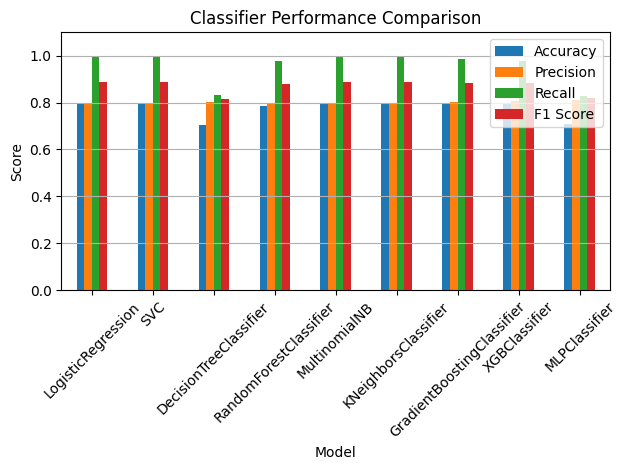

In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load the datasets
train_df = pd.read_csv("toxicbias_train.csv")
test_df = pd.read_csv("toxicbias_test.csv")

# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([char for char in text if not char.isdigit()])
    return text

train_df['clean_text'] = train_df['comment_text'].apply(clean_text)
test_df['clean_text'] = test_df['comment_text'].apply(clean_text)

# Encode target labels
train_df['bias'] = train_df['bias'].map({'neutral': 0, 'bias': 1})
test_df['bias'] = test_df['bias'].map({'neutral': 0, 'bias': 1})

# TF-IDF feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])
y_train = train_df['bias']
y_test = test_df['bias']

# Classifiers
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    MLPClassifier()
]

# Evaluate and store metrics
comparison_data = []
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

    comparison_data.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(comparison_data)

# Plot the comparison
plt.figure(figsize=(14, 8))
metrics_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar")
plt.title("Classifier Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# New section

In [ ]:
glove_file = "/content/glove.6B.100d.txt"
